# Step 1: Investigate dataframe with the right anaconda env

### if you are working in a jupyter notebook, this is that you install packages

```bash
# ! pip install pandas 
# ! pip install numpy
# ! pip install matplotlib
# ! pip install plotly
# ! pip install seaborn
```

## Create and load the anaconda env with the correct packages

I am using Anaconda and the terminal in a files named `001_text_classification.py, 002_text_classification.py...`

```bash

[env]
# Conda Environment
conda create --name sentiment_analysis python=3.9.13
conda info --envs
source activate sentiment_analysis
conda deactivate

# if needed to remove
conda env remove -n [NAME_OF_THE_CONDA_ENVIRONMENT]
conda env remove -n sentiment_analysis
conda env remove -n faststream_kafka



# update conda 
conda update -n base -c defaults conda

# to export requirements
pip freeze > requirements.txt

# to install
pip install -r requirements.txt


# [path]
cd /Users/brunoflaven/Documents/02_copy/DERA_Ghislain_USECASES/

# LAUNCH the file
python 001_text_classification.py
jupyter notebook

```

## Some explorations of the dataframe + data manipulations (wrangling)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
# To save hugging face access token in environment
import os 

# warnings.filterwarnings("ignore")
# %matplotlib inline

# below imports for langchain framework
# from langchain import HuggingFaceHub
# from langchain.chains import LLMChain
# from langchain.prompts import PromptTemplate

FULL_CSV_SOURCE='data/df_file_1.csv'


df = pd.read_csv(FULL_CSV_SOURCE)
# print(df)
# print(df.head())

# columns
# df.columns
# print(df.columns)

# df.info()
# print(df.info())



# updating data with 'Label' column to decode the integer labels with categorical labesl for easy inference
vis_df = df
vis_df['Label'] = vis_df['Label'].map({0:'Politics',1:'Sport',2:'Technology',3:'Entertainment',4:'Business'})

print('\n --- result_1')
print(f"The dataset contains { vis_df.Label.nunique() } unique categories")
# print(vis_df.columns)
print(vis_df.head())

print('\n --- result_2')
# filtered_rows = df[(df['Label'] == 0) | (df['Label'] == 3)]

# filtered_rows = df[(df['Label'] == 'Politics')]
# filtered_rows = df[(df['Label'] == 'Sport')]
# filtered_rows = df[(df['Label'] == 'Technology')]
# filtered_rows = df[(df['Label'] == 'Entertainment')]
# filtered_rows = df[(df['Label'] == 'Business')]
# print(filtered_rows)


 --- result_1
The dataset contains 5 unique categories
                                                Text     Label
0  Budget to set scene for election\n \n Gordon B...  Politics
1  Army chiefs in regiments decision\n \n Militar...  Politics
2  Howard denies split over ID cards\n \n Michael...  Politics
3  Observers to monitor UK election\n \n Minister...  Politics
4  Kilroy names election seat target\n \n Ex-chat...  Politics

 --- result_2


In [6]:
#calculating the length of text
df['text_len'] = df['Text'].apply(lambda x: len(str(x).split()))

# output
# print(df['text_len'])


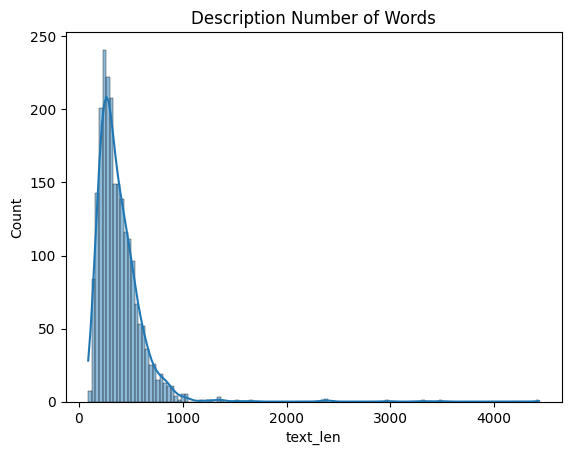

In [13]:

# DEPRECATED
# sns.distplot(df['text_len'])
# plt.title('Description Number of Words')
# plt.show()

# check https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

# example_1
# sns.histplot(df["text_len"])

# example_2
# sns.displot(df["text_len"])

# example_3
sns.histplot(df["text_len"], kde=True)

# example_4
# sns.histplot(df["text_len"], kde=True, stat="density")

# example_5
"""
sns.histplot(
    df["text_len"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
"""
# example_6

"""
sns.histplot(
    df["text_len"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)
"""

# example_6
# sns.kdeplot(df["text_len"])

# example_7
# sns.displot(df["text_len"], kind="kde")

# example_8
"""
sns.histplot(df, x="text_len", alpha=.4)
sns.rugplot(df, x="text_len")
"""

# example_9
# sns.displot(df, x="text_len", alpha=.4, rug=True)


# legend
plt.title('Description Number of Words')
plt.show()



In [14]:
# shuffling the dataframe to pick random set of text for the experiment
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# output
# print (df)

                                                   Text          Label  \
0     David Blunkett in quotes\n \n David Blunkett -...       Politics   
1     Benitez issues warning to Gerrard\n \n Liverpo...          Sport   
2     Brookside creator's Channel 4 bid\n \n The cre...  Entertainment   
3     Brown visits slum on Africa trip\n \n Chancell...       Politics   
4     Gritty return for Prince of Persia\n \n Still ...     Technology   
...                                                 ...            ...   
2220  Moreno debut makes Oscar mark\n \n Catalina Sa...  Entertainment   
2221  Musical future for phones\n \n Analyst Bill Th...     Technology   
2222  What's next for next-gen consoles?\n \n The ne...     Technology   
2223  Humanoid robot learns how to run\n \n Car-make...     Technology   
2224  Jones happy with Henson heroics\n \n Wales fly...          Sport   

      text_len  
0          289  
1          158  
2          164  
3          258  
4          523  
...      

In [16]:
#list of all categories
categories = ['Politics','Sport','Technology','Entertainment','Business']

# data frame after shuffling
df.head()

,Text,Label,text_len
0,David Blunkett in quotes\n \n David Blunkett -...,Politics,289
1,Benitez issues warning to Gerrard\n \n Liverpo...,Sport,158
2,Brookside creator's Channel 4 bid\n \n The cre...,Entertainment,164
3,Brown visits slum on Africa trip\n \n Chancell...,Politics,258
4,Gritty return for Prince of Persia\n \n Still ...,Technology,523
